# Sentence Classification Analysis Project

## Description
This project focuses on performing sentence classification analysis, where the goal is to categorize sentences into predefined classes or labels. Sentence classification finds applications in various areas, including text classification, sentiment analysis, spam detection, and intent recognition.

The project can be approached through the following steps:

1. **Data Collection**: Gather a labeled dataset of sentences with their corresponding classes or labels. This can be obtained from public datasets, online resources, or through manual annotation.

2. **Data Preprocessing**: Clean and preprocess the sentence data by removing noise, special characters, and irrelevant information. Perform text normalization techniques such as tokenization, removing stop words, and stemming or lemmatization, as needed.

3. **Feature Extraction**: Transform the preprocessed sentences into numerical representations that machine learning algorithms can process. Common techniques include bag-of-words, word embeddings (e.g., Word2Vec, GloVe), or more advanced approaches such as transformers (e.g., BERT, GPT).

4. **Model Training**: Select a suitable machine learning or deep learning model for sentence classification, such as logistic regression, random forests, support vector machines (SVMs), or recurrent neural networks (RNNs). Train the chosen model using the labeled dataset.

5. **Evaluation and Performance Metrics**: Assess the performance of the trained model using appropriate evaluation metrics such as accuracy, precision, recall, or F1 score. Utilize techniques like cross-validation or train-test splits to ensure reliable evaluation.

6. **Prediction and Deployment**: Apply the trained model to classify new, unseen sentences into their respective classes or labels. If desired, deploy the model as an API or integrate it into an application for real-time sentence classification.

**Note**: Customize the project to fit your specific needs, whether it's sentiment analysis, spam detection, or any other sentence classification task. Document the project thoroughly, including the dataset, preprocessing steps, model selection, training parameters, and evaluation results, to ensure reproducibility and transparency.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
# Load the dataset
train_df = pd.read_csv('data/train_E6oV3lV.csv', index_col='id')
test_df = pd.read_csv('data/test_tweets_anuFYb8.csv')

In [3]:
train_df.head()

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


In [4]:
train_df.shape

(31962, 2)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


In [6]:
train_df.isnull().sum()

label    0
tweet    0
dtype: int64

In [7]:
train_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<AxesSubplot: >

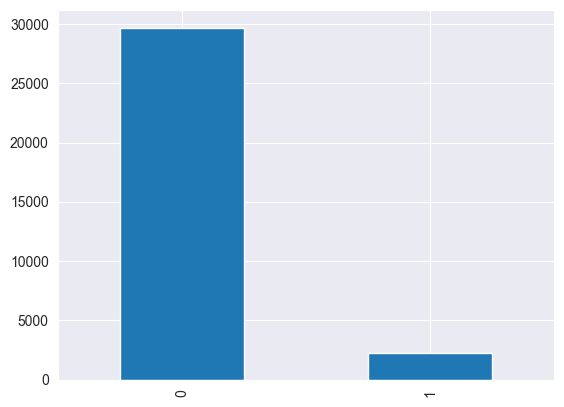

In [8]:
train_df['label'].value_counts().plot(kind='bar')

In [9]:
# Lowercase the tweets
train_df['tweet'] = train_df['tweet'].str.lower()

In [10]:
# Remove the twitter handles
train_df['tweet'] = train_df['tweet'].apply(lambda x: re.sub(r'@\w+', '', x))

In [11]:
# Remove the punctuations
train_df['tweet'] = train_df['tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [12]:
# Remove the numbers
train_df['tweet'] = train_df['tweet'].apply(lambda x: re.sub(r'[0-9]+', '', x))

In [13]:
# Remove the whitespaces
train_df['tweet'] = train_df['tweet'].apply(lambda x: x.strip())

In [14]:
# Remove Special Characters
train_df['tweet'] = train_df['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [15]:
# Remove the stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text.split() if word not in stop_words]
    return ' '.join(text)
train_df['tweet'] = train_df['tweet'].apply(lambda x: remove_stopwords(x))

In [16]:
train_df.head()

,label,tweet
id,,
1,0,father dysfunctional selfish drags kids dysfun...
2,0,thanks lyft credit cant use cause dont offer w...
3,0,bihday majesty
4,0,model love u take u time ur
5,0,factsguide society motivation


In [17]:
# Lemmatize the tweets
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(text)
train_df['tweet'] = train_df['tweet'].apply(lambda x: lemmatize_text(x))

In [18]:
train_df.head()

,label,tweet
id,,
1,0,father dysfunctional selfish drag kid dysfunct...
2,0,thanks lyft credit cant use cause dont offer w...
3,0,bihday majesty
4,0,model love u take u time ur
5,0,factsguide society motivation


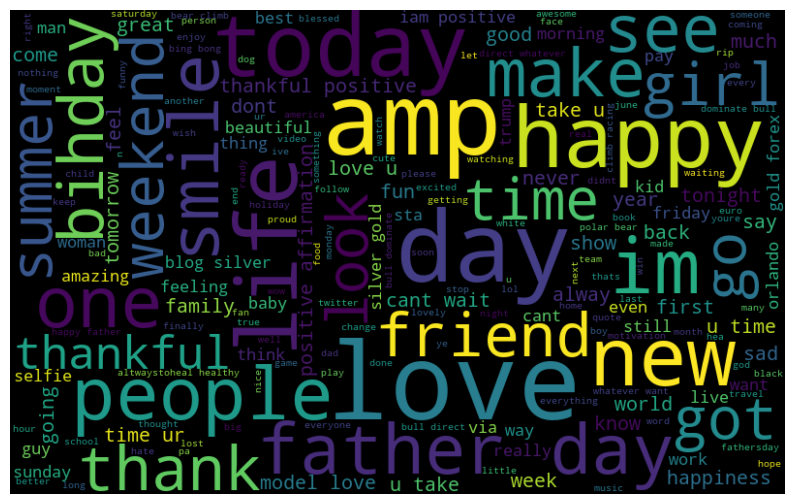

In [19]:
from wordcloud import WordCloud

# Generate the word cloud
all_words = ' '.join([text for text in train_df['tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

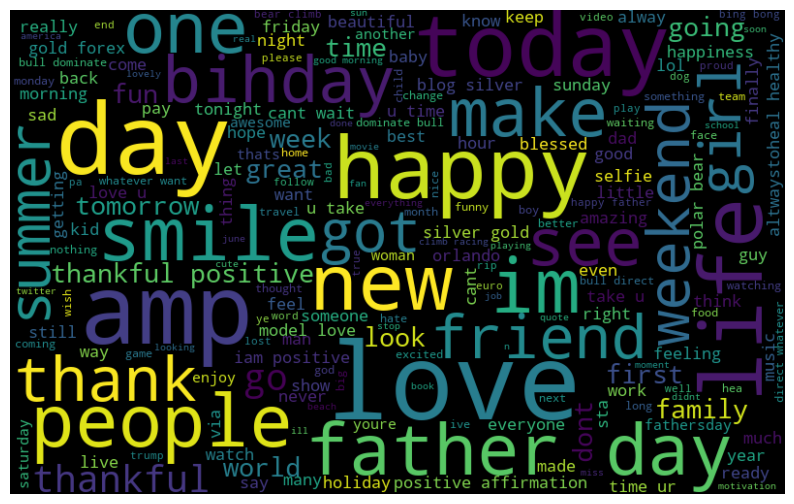

In [20]:
# Generate the word cloud for positive tweets
positive_words = ' '.join([text for text in train_df['tweet'][train_df['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

# Plot the word cloud for positive tweets
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


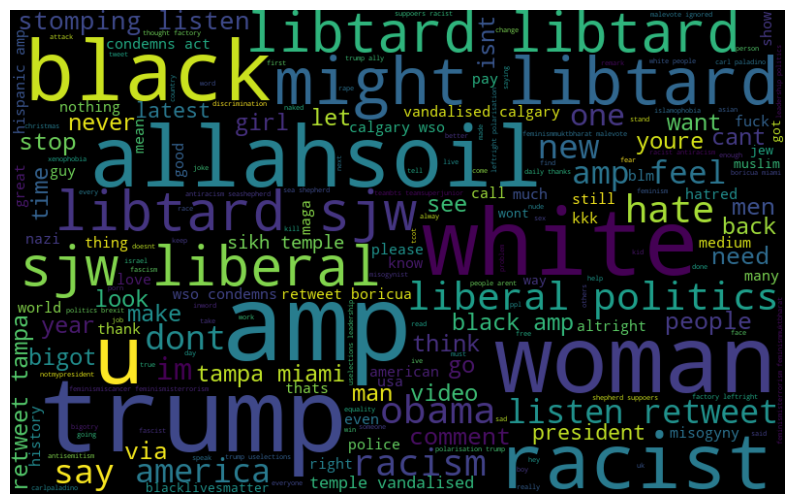

In [21]:
# Generate the word cloud for negative tweets
negative_words = ' '.join([text for text in train_df['tweet'][train_df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

# Plot the word cloud for negative tweets
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [22]:
# Upsample the minority class
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = train_df[train_df['label'] == 0]
df_minority = train_df[train_df['label'] == 1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=29720, random_state=123)

# Combine the majority class with the upsampled minority class
train_df = pd.concat([df_majority, df_minority_upsampled])

In [23]:
train_df['label'].value_counts()

0    29720
1    29720
Name: label, dtype: int64

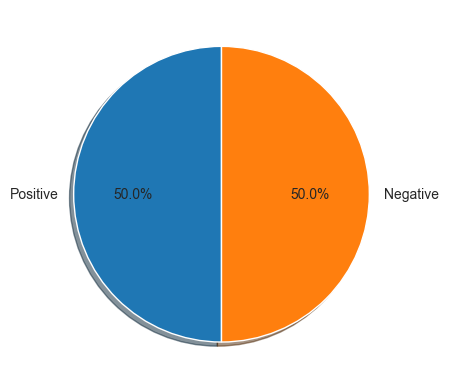

In [24]:
plt.pie(train_df['label'].value_counts(), labels=['Positive', 'Negative'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [25]:
# Split the dataset into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df['tweet'], train_df['label'], test_size=0.2, random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47552,), (11888,), (47552,), (11888,))

In [26]:
# Tokenize the tweets
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)

In [27]:
# Convert the text sequences into integer sequences
train_seq = tokenizer.texts_to_sequences(X_train)
train_pad = pad_sequences(train_seq, maxlen=50, padding='post', truncating='post')

test_seq = tokenizer.texts_to_sequences(X_test)
test_pad = pad_sequences(test_seq, maxlen=50, padding='post', truncating='post')





In [28]:
# Build the model
model = keras.Sequential([
    layers.Embedding(input_dim=5000, output_dim=16, input_length=50),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            80000     
                                                                 
 bidirectional (Bidirection  (None, 50, 128)           41472     
 al)                                                             
                                                                 
 dense (Dense)               (None, 50, 64)            8256      
                                                                 
 batch_normalization (Batch  (None, 50, 64)            256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 dense_1 (Dense)             (None, 50, 1)             6

In [33]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_delta=1e-4, mode='min')

In [34]:
# Train the model
history = model.fit(train_pad, y_train, batch_size=32, epochs=20, validation_data=(test_pad, y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/20
1486/1486 [==============================] - 40s 25ms/step - loss: 0.1676 - accuracy: 0.9380 - val_loss: 0.0866 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 2/20
1486/1486 [==============================] - 37s 25ms/step - loss: 0.0816 - accuracy: 0.9751 - val_loss: 0.0733 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 3/20
1486/1486 [==============================] - 35s 23ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0672 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 4/20
1486/1486 [==============================] - 39s 26ms/step - loss: 0.0493 - accuracy: 0.9858 - val_loss: 0.0662 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 5/20
1486/1486 [==============================] - 35s 24ms/step - loss: 0.0396 - accuracy: 0.9887 - val_loss: 0.0746 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 6/20
1486/1486 [==============================] - 35s 24ms/step - loss: 0.0345 - accuracy: 0.9900 - val_loss: 0.0566 - val_accuracy: 0.9817 - lr: 0.0010
Epoch 7/20
1486/1486 [========================

<AxesSubplot: >

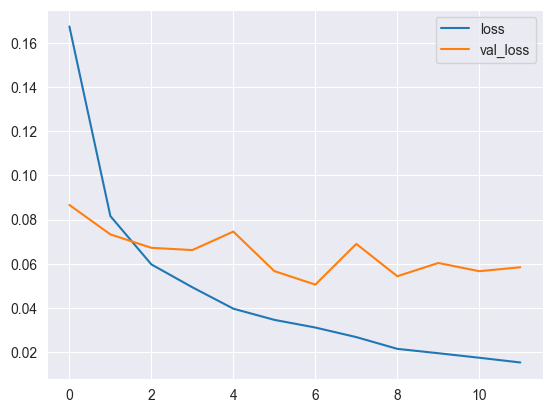

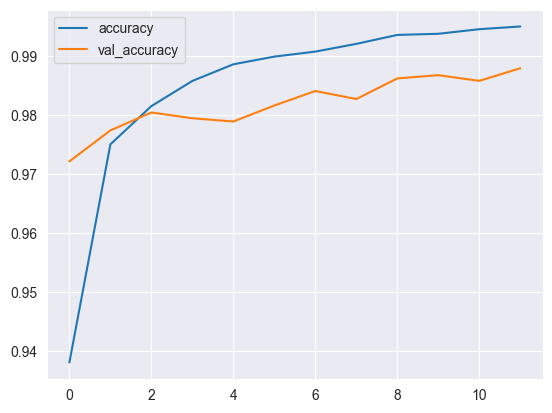

In [35]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()


In [39]:
# Make predictions on the test set
test_pred = model.predict(test_pad)
test_pred

372/372 [==============================] - 3s 9ms/step


array([[[9.9997967e-01],
        [9.9999905e-01],
        [9.9999660e-01],
        ...,
        [9.9732625e-01],
        [9.9749577e-01],
        [9.9772537e-01]],

       [[3.1288687e-04],
        [4.5099412e-04],
        [3.2174223e-04],
        ...,
        [1.2312593e-03],
        [1.0813773e-03],
        [8.6958037e-04]],

       [[9.8743135e-01],
        [9.7359413e-01],
        [9.8301458e-01],
        ...,
        [9.9501121e-01],
        [9.9534631e-01],
        [9.9584824e-01]],

       ...,

       [[9.9933583e-01],
        [9.9937791e-01],
        [9.9949682e-01],
        ...,
        [9.9549925e-01],
        [9.9577582e-01],
        [9.9620724e-01]],

       [[2.0619048e-01],
        [1.2184522e-01],
        [1.6769408e-01],
        ...,
        [4.9303159e-01],
        [5.2410293e-01],
        [5.6523651e-01]],

       [[7.4216910e-04],
        [3.7419726e-04],
        [2.6109396e-04],
        ...,
        [1.1418365e-03],
        [1.0074147e-03],
        [8.1359758e-04]]

In [40]:
# Convert the predictions to binary values
test_pred = np.where(test_pred >= 0.5, 1, 0)
test_pred

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]])